In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

In [3]:
housing = pd.read_csv('./data/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

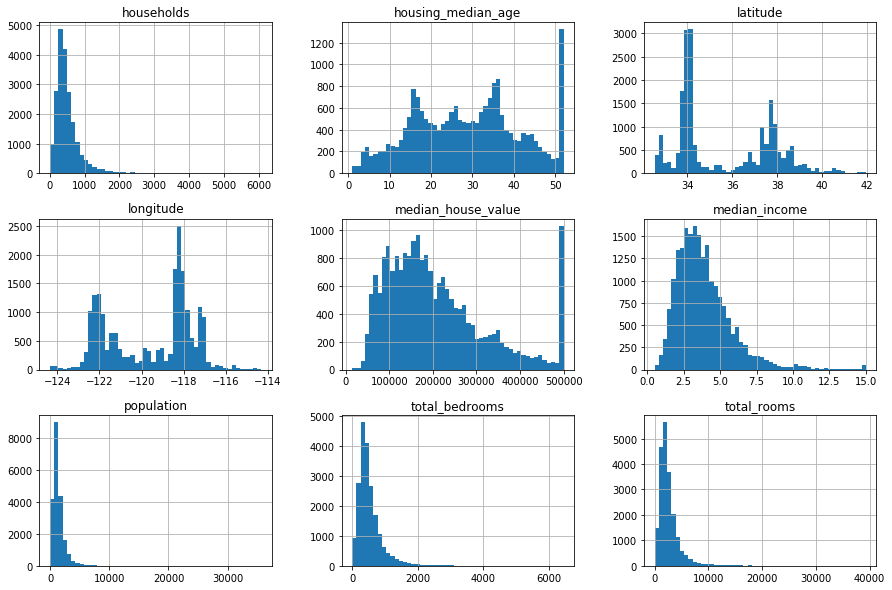

In [9]:
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(15,10))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2,
                                      random_state=42)

In [12]:
train_set.shape,test_set.shape

((16512, 10), (4128, 10))

In [13]:
type(train_set)

pandas.core.frame.DataFrame

目前我们讲的划分测试集和训练集的方法是纯随机，当我们的数据集比较大的时候，这是一个很好的方法，但如果数据集不够大就将出现采样偏差问题，就例如对1000人进行问卷调查，你到师范学校发现男女比例3：7女生那么多。。。为了反应总体，你应该男性选择男生300人女性700人。这就叫做分层采样(stratifed sampling)，至于选取哪个特征作为分类指标和分多少层这就需要根据实际的工作场景来判断，在这里选取median_income作为分层指标

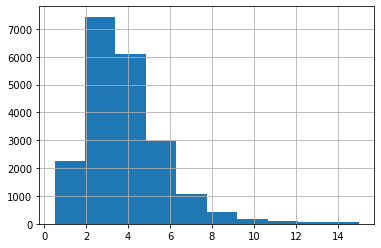

In [14]:
housing['median_income'].hist()

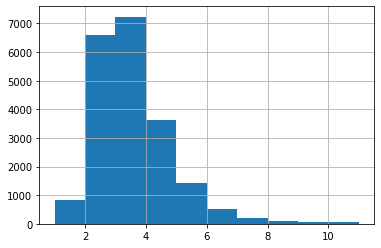

In [15]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].hist()

In [16]:
housing['income_cat'].describe()

count    20640.000000
mean         3.093362
std          1.303707
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: income_cat, dtype: float64

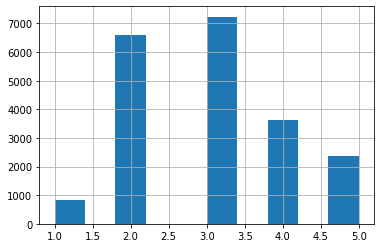

In [17]:
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()

In [18]:
# 对样本分好了类别，并加上了income_cat标签后，就可以分层采样
from sklearn.model_selection import StratifiedShuffleSplit


In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, 
                               random_state=42)
for train_index, test_index in split.split(housing, 
                                           housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

上述`n_split`是迭代次数。数据集划分为训练集和测试集后，刚刚添加的辅助分类特征可以删除掉　

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [21]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

## 可视化数据


目前我们只是大概了解了数据的类型，以及对数据集进行了划分，下面我们要对数据进行更深一步的探索，以下的操作只在训练集上面进行，由于该数据集比较的小，我们就直接在数据集上面进行操作，为了防止数据集被修改，我们先复制一份


In [22]:
housing = strat_train_set.copy()

Text(0, 0.5, 'latitude')

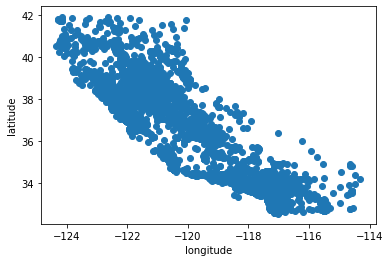

In [23]:
plt.scatter(housing['longitude'], housing['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')

Text(0, 0.5, 'latitude')

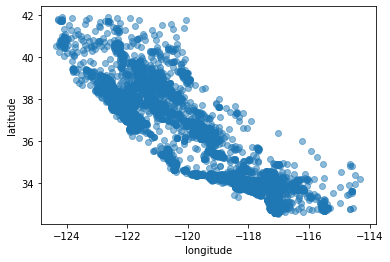

In [24]:
# 数据太密集，可以通过alpha值来设置图形显示　
plt.scatter(housing['longitude'], housing['latitude'],alpha=.5)
plt.xlabel('longitude')
plt.ylabel('latitude')

我们对图像敏感，但要发现图像中的某些规律还是需要我们调节一下参数的，现在我们就能清楚的从图中看到稠密的地区了，接下来我们将房价、人口也加入图中

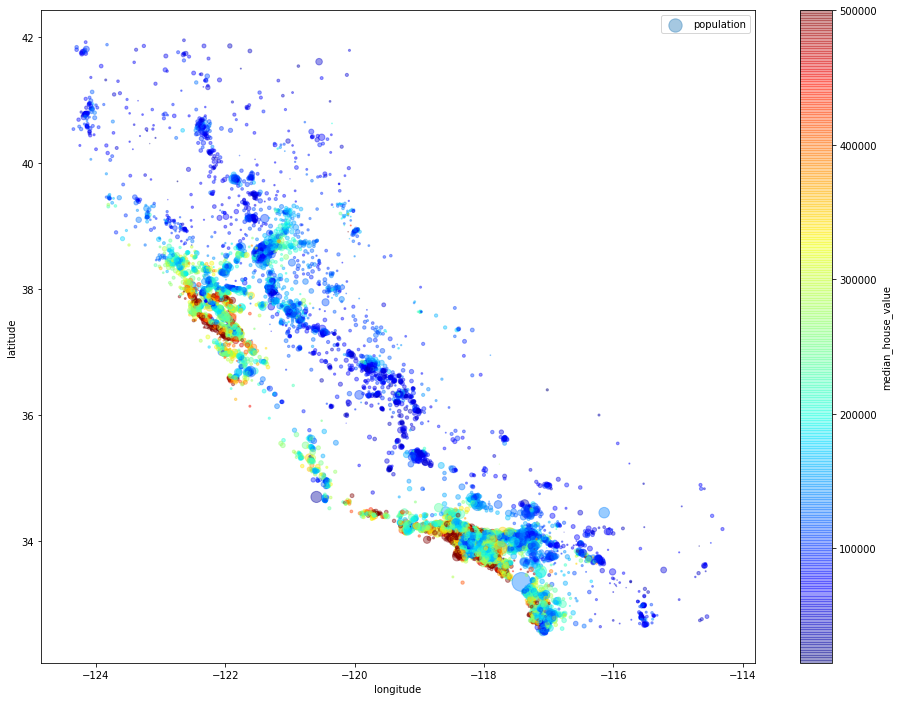

In [25]:
housing.plot(kind='scatter',x='longitude', y='latitude',
            alpha=.4, s=housing['population']/100,
            label="population", figsize=(16,12),
            c='median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True, sharex=False)
plt.legend()

图中的小圆圈是代表该区域的人口由参数s控制，颜色代表该区域的房价由参数c控制。
从上面的图中可以得出一些规律：房价不仅与地理位置有关，还和人口稠密度有关

### 相关性

下面查看下各个特征跟`median_house_value`这一特征的相关性，使用`Pearson`相关系数

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

上面是通过计算相关系数矩阵找出特征之间的相关性，还有一种方法是通过绘制特征之间分布，pandas提供了`scatter_matrix`方法，顾名思义就是使用散点图形式绘制出特征与特征之间的关系。取出相关系数排名前四的特征作为我们需要绘制的属性，会得到一个4*4个图像

In [28]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3b9024150>,
      dtype=object)

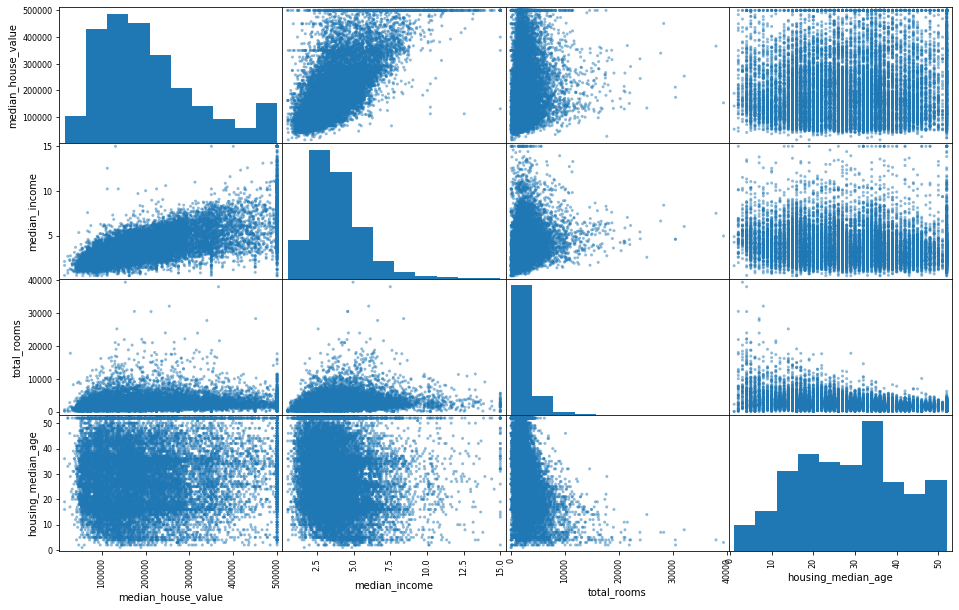

In [29]:
attribute = ['median_house_value','median_income','total_rooms',
             'housing_median_age']
scatter_matrix(housing[attribute], figsize=(16,10))

### 特征组合
前面介绍了通过可视化数据的方法来从发现潜在的规律，我们发现了特征之间的关系、还发现了一些特征有着长尾分布，以上发现的这些规律有助于我们对特征进行选择，或者对数据进行转化（如取log）等等，还有一个步骤我们可以尝试使用，那就是特征组合。在这里本文使用了总房间数、家庭人数以及人口数这三个特征的组合

In [30]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


从上面结果可以看出bedrooms_per_room较total_bedrooms有着更高的相关性，bedrooms/rooms比越小的房价越高，从rooms_per_household可以看出，房子越大房价越贵。

## 数据预处理

在使用机器算法之前，我们先把数据做下预处理，先把特征和标签拆分出来

In [31]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

### 数据清洗

大多数机器学习算法是不能在有缺失值的数据集上面运行的，而本数据集特征total_bedrooms是存在数据缺失现象的，所以就需要想办法处理，有以下几个思路：

1. 将存在缺失数据的样本去除掉
2. 将存在缺失数据的特征去除掉
3. 将缺失值用统一的值替换，如：均值、中值等

In [32]:
# 对应上面操作
housing.dropna(subset=["total_bedrooms"]) # 1.删除样本
housing.drop("total_bedrooms", axis=1) # 2.删除特征，注意参数的用法和1不一样
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # 3. 中值填充

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

如果采用的是方法3那么就需要将替换的值保存起来，在后续的工作中需要将它应用到测试集，以及可能添加的新数据。上面这个操作是使用pandas，sklearn提供了Imputer,同样能够很好解决缺失值问题，下面其用法

In [33]:
from sklearn.preprocessing import Imputer

In [34]:
imputer = Imputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1) # 去除非数值特征
imputer.fit(housing_num)

/home/tianqin/.conda/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
housing.shape

(16512, 9)

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
# 将计算得到的数据应用到数据集中
X = imputer.transform(housing_num)

In [39]:
type(X)

numpy.ndarray

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### 处理标签类特征
决策树、贝叶斯等分类器能够处理标签类特征，但很多算法是不能处理这类特征，需要转换为数值类型，sklearn提供了LabelEncoder特征转换方法

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder = LabelEncoder()
house_cat = housing['ocean_proximity']
house_cat_encoded = encoder.fit_transform(house_cat)

In [43]:
house_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [44]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

通过类别号可以表示类别，还有一种方法能够表示类别---one hot,该特征取的值位置为1，其余为0；当然sklearn也提供了实现方法OneHotEncoder

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(house_cat_encoded.reshape(-1, 1))#返回的为稀疏矩阵

/home/tianqin/.conda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
# 可以将上面encoder和one hot过程合并为一个
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(house_cat)

In [48]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### 自定义处理方法

尽管sklearn提供了强大的数据处理功能，有些时候我们需要根据自己的需求自定义一些数据预处理方法，并且让我们这些操作有着sklearnAPI相似的用法，我们所需要做的就是继承BaseEstimator类，并覆写三个方法fit，transform和fit_transform，第三个方法是前两个的整合，如果不想覆写fit_transform,可以继承TransformerMixin(从类名称就可以看出其作用)这个类

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [70]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [71]:
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [72]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

上面定义的类的功能是为原数据集添加新的特征，X[:,3]表示的是第4列所有数据，np.c_表示的是拼接数组。
另外sklearn是不能直接处理DataFrames的，那么我们需要自定义一个处理的方法将之转化为numpy类型

In [73]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names): #可以为列表
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values #返回的为numpy array

### 特征缩放

机器学习算法在缩放尺度不一样的数据效果比较差，比就如房价数据集total_bedrooms的取值范围为1～6445，而median_income的范围是0.5~15，所以需要对特征进行缩放。
note:通常情况下Target特征不需缩放
有两种缩放数据的方法

1. min_max方式：
MinMaxScaler(self, feature_range=(0,1), copy=True)
2. standardization标注化数据
StandardScaler(self, copy=True, with_mean=True, with_std=True)

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

### 特征处理流程

前在数据预处理阶段，我们需要对缺失值进行处理、特征组合和特征缩放。每一步的执行都有着先后顺序，sklearn提供了Pipeline帮助顺序完成转换。

In [75]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([ #标签类型
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder()),
    ])

/home/tianqin/.conda/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
# 上面着两个流程还可以再整合一起
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [78]:
type(housing_prepared)

scipy.sparse.csr.csr_matrix

In [80]:
housing_prepared.shape

(16512, 16)

In [81]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


## 训练模型

### 在测试集上训练模型

经验告诉我们，在使用机器学习算法的时候，一开始先选用简单的模型，撸一个baseline是一个很好的习惯。所以我们先尝试使用线性回归模型，先使用几个样本尝试以下该分类器：

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_preared = full_pipeline.transform(some_data)
print('prediction:',lin_reg.predict(some_data_preared))

prediction: [210644.60467221 317768.80664627 210956.43338007  59218.98902052
 189747.5585246 ]


In [87]:
print('labels', some_labels.values)

labels [286600. 340600. 196900.  46300. 254500.]


不错，看来我们之前的一些预处理工作和分类器都能正常运行。那么我们该如何衡量我们的算法的好坏呢？sklearn提供了root mean squared error,RMSE作为评价指标

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)


In [90]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


从第一节housing.describe()中我们知道median_housing_values的范围为14W-50W ,着也意味着分类器欠拟合训练数据，我们需要做的是找一个能力更加强大的分类器或者减少对模型的约束。尝试以下非线性回归模型DecisionTreeRegressor，回归决策树能够找出复杂的非线性关系

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [94]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)


In [95]:
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


误差竟然为0，实际上可能发生了严重的过拟合。那么问题来了，我们该如何分析结果到底是欠拟合还是过拟合呢？下面就引入了交叉验证

### 交叉验证

由于目前我们的测试集是不能动的，因为还没到确定最终的模型。我们可以把训练集再划分为训练集和测试集两部分。我们可以使用前面提到的train_test_split方法，不过强大的sklearn还提供了K-fold交叉验证方法：

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
socres = cross_val_score(tree_reg, housing_prepared,
                        housing_label, scoring='neg_mean_squared_error',
                        cv=10)

In [98]:
rmse_scores = np.sqrt(-socres)

In [99]:
rmse_scores

array([68752.05647137, 66464.54694717, 71464.08214355, 69087.65320137,
       70191.36783649, 74262.48740308, 70342.08178305, 71243.13315574,
       75787.17074056, 68684.01716449])

In [100]:
rmse_scores.mean()

70627.85968468674

In [101]:
rmse_scores.std()

2611.1607229383676

sklearn提供的交叉验证方法希望得到一个较大的值(越大越好),这个和损失函数正好相反(越小越好)，所以使用的是-score
看到了上面的结果，发现决策是的效果其实很一般，甚至还没有线性回归的结果好（增加了3K）。
现在看以下线性回归的交叉验证值

In [102]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                            housing_label, scoring='neg_mean_squared_error',
                            cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [103]:
lin_rmse_scores

array([66782.73840917, 66960.11770454, 70347.95253774, 74739.57052714,
       68031.1338941 , 71193.84183701, 64969.63057974, 68281.61137785,
       71552.91570308, 67665.10085522])

In [104]:
lin_rmse_scores.mean()

69052.46134256144

In [105]:
lin_rmse_scores.std()

2731.6740366280355

使用随机森林

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
housing_predictions = forest_reg.predict(housing_prepared)

/home/tianqin/.conda/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
forest_mse = mean_squared_error(housing_label, housing_predictions)

In [109]:
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

22440.852379117467


In [110]:
forest_scores = cross_val_score(forest_reg, housing_prepared,
                               housing_label,
                                scoring='neg_mean_squared_error',
                               cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [111]:
forest_rmse_scores

array([52593.24008783, 50117.55648429, 52242.47533276, 54617.03507109,
       51144.4730084 , 55828.03037311, 52340.45433903, 50331.60990997,
       54917.69730852, 53470.45370084])

In [112]:
forest_rmse_scores.mean()

52760.302561584045

In [113]:
forest_rmse_scores.std()

1843.4468715207106

上面列举了使用线性回归、决策树回归和随机森林回归的方法。可以看的出随机森林的效果最好，如果你想还可以继续尝试其他的算法比如SVR、神经网络等，找出效果较好的模型。

## 模型调优

### 网格搜索

列举出参数组合，直到找到比较满意的参数组合，这是一种调优方法，当然如果手动选择并一一进行实验这是一个十分繁琐的工作，sklearn提供了GridSearch-网格搜索方法，我们只需要将每一个参数的取值告诉它，网格搜索将使用交叉验证方法对所有情况进行验证，并返回结果最好的组合

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = [
    # 12(3x4)中参数组合
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]}, #组合１
    {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
    # 6 (2x3)中参数组合
]

forest_reg = RandomForestRegressor(random_state=42)

# ５折交叉验证，总共需要(12+6)x5=90次训练
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

Note:上面param_grid中的字典key可不是随便起的，这些都是需要网格搜索的模型中的参数。另外当你不知道如何选取参数的时候可以按照10的平方取值或者从小到大的值。

In [116]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [117]:
grid_search.best_score_

-2468326308.8063836

In [118]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

### 在测试集上评估模型

上面我们已经得到了我们最好的模型，那么模型到底如何呢？是骡子是马拉出来溜溜，测试集该上场了

In [119]:
final_model = grid_search.best_estimator_
#去掉标签
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
#这个时候只需要transform
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
#均方误差
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [120]:
final_rmse

47730.22690385927

### 持久化模型

模型已经建立好了，当下次再使用的时候，为了避免再次繁琐的训练过程，我们考虑将模型给存储起来，python提供了pickle方法，当然我们也可以使用sklearn提供的joblib方法，这种方法相对更加的高效。

In [122]:
import joblib

In [123]:
joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

In [124]:
restored_model = joblib.load('best_model.pkl')

In [125]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

In [126]:
final_rmse

47730.22690385927